### 5. Data visualizations

Before creating the sample data and starting to plot, let's import **matplotlib.pyplot** subpackage (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) :

In [1]:
import matplotlib.pyplot as plt

The most fundamental, but nevertheless quite powerful, plotting function is **plt.plot()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) . In principle, it needs two sets of numbers:

* __x__ values: a **list** or an **array** containing the x coordinates;
* __y__ values: a **list** or an **array** containing the y coordinates.

The number of **x** and __y__ values provided must match. Consider the following code:

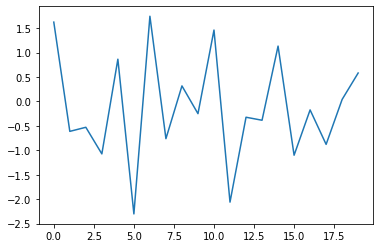

In [3]:
import numpy as np

np.random.seed(1)
y = np.random.standard_normal(20)
x = np.arange(len(y))
plt.plot(x, y)

**plt.plot()** notices when an **ndarray** object is passed. If one provides only the __y__ values, **plt.plot()** takes the index values as the respective **x** values. Therefore, the following single line of code generates exactly the same output:

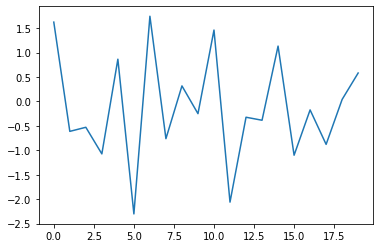

In [4]:
plt.plot(y)

Since the majority of the **ndarray** methods return again an **ndarray** object, one can also pass the object with a method (or even multiple methods, in some cases) attached. By calling the **.cumsum()** method on the **ndarray** object with the sample data, one gets the cumulative sum of this data and, as to be expected, a different output:

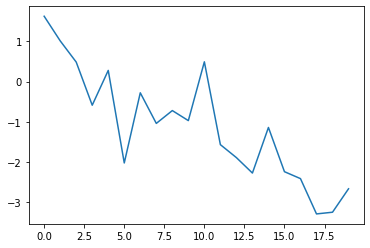

In [5]:
plt.plot(y.cumsum())

In addition, **matplotlib.pyplot** offers a large number of functions to customize the plotting style. Some are easily accessible, for others one has to dig a bit deeper. Easily accessible, for example, are those functions that manipulate the axes (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html#matplotlib.pyplot.axis) and those that relate to grids (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html#matplotlib.pyplot.grid) and labels:

(-0.9500000000000001, 19.95, -3.5381550423114643, 1.8701787163287038)

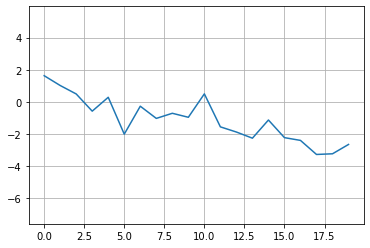

In [6]:
plt.plot(y.cumsum())
plt.grid(True)
plt.axis('equal')

In addition, one can directly set the minimum and maximum values of each axis by using **plt.xlim()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html#matplotlib.pyplot.xlim) and **plt.ylim()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html#matplotlib.pyplot.ylim) . The following code provides an example:

(-3.792321689646002, 2.1243453636632417)

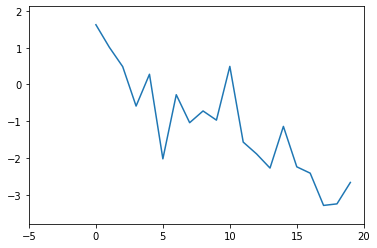

In [7]:
plt.plot(y.cumsum())
plt.xlim(-5, 20)
plt.ylim(np.min(y.cumsum()) - 0.5,
         np.max(y.cumsum()) + 0.5)

For the sake of better readability, a plot usually contains a number of labels — e.g., a title and labels describing the axes. These are added by the functions **plt.title()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title), **plt.xlabel()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel), and **plt.ylabel()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel), respectively. By default, **.plot()** plots continuous lines, even if discrete data points are provided. The plotting of discrete points is accomplished by choosing a different style option. Plot with typical label overlays (red points) and a (blue) line with width of 1.5:

Text(0.5, 1.0, 'A Simple Plot')

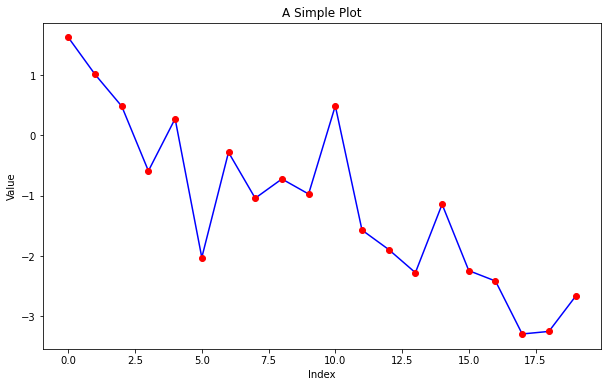

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(y.cumsum(), 'b', lw=1.5)
plt.plot(y.cumsum(), 'ro')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('A Simple Plot')

Any color abbreviation can be combined with any style character. In this way, one can make sure that different data sets are easily distinguished.

The following code generates a two-dimensional sample data set as a **NumPy** **ndarray** object of shape 20×2 with standard normally distributed pseudo-random numbers. On this array, the method **.cumsum()** is called to calculate the cumulative sum of the sample data along axis 0:

In [9]:
np.random.seed(2)
y = np.random.standard_normal((20, 2)).cumsum(axis=0)
y

array([[ -0.41675785,  -0.05626683],
       [ -2.55295394,   1.58400398],
       [ -4.34638953,   0.74225662],
       [ -3.84350811,  -0.50303147],
       [ -4.90146033,  -1.41203909],
       [ -4.35000629,   0.88016893],
       [ -4.30846689,  -0.23775652],
       [ -3.76940857,  -0.83391622],
       [ -3.78853907,   0.341085  ],
       [ -4.53641002,   0.35011025],
       [ -5.41451791,   0.19367608],
       [ -5.15794746,  -0.79510297],
       [ -5.49676942,  -1.031287  ],
       [ -6.13442444,  -2.21889928],
       [ -7.55564166,  -2.37239448],
       [ -7.82469862,  -0.14102769],
       [-10.2594662 ,  -0.02830119],
       [ -9.88902166,   1.33133268],
       [ -9.38716446,   0.48711897],
       [ -9.3871547 ,   1.02947154]])

In general, one can also pass such two-dimensional arrays to **plt.plot()**. It will then automatically interpret the contained data as separate data sets (along axis 1, i.e., the second dimension):

Text(0.5, 1.0, 'A Simple Plot')

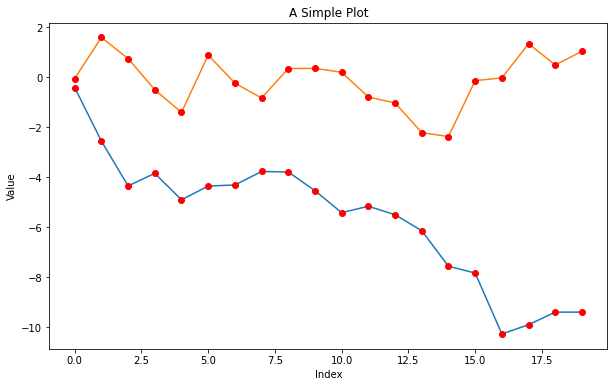

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(y, lw=1.5)
plt.plot(y, 'ro')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('A Simple Plot')

In such a case, further annotations might be helpful to better read the plot. You can add individual labels to each data set and have them listed in the legend. **plt.legend()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend) accepts different locality parameters. __0__ stands for best location, in the sense that as little data as possible is hidden by the legend. In the code, the **ndarray** object is not passed as a whole but the two data subsets (**y[:, 0]** and **y[:, 1]**) are accessed separately, which allows to attach individual labels to them:

Text(0.5, 1.0, 'A Simple Plot')

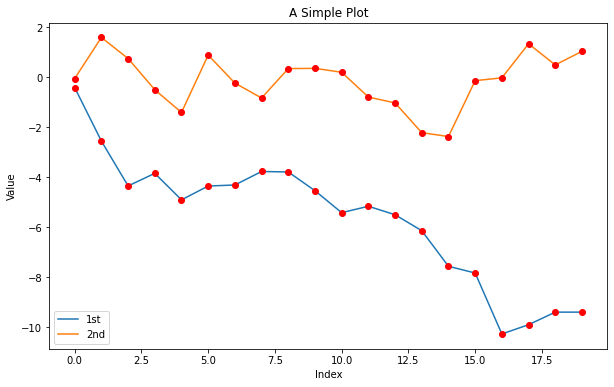

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.legend(loc=0)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('A Simple Plot')

Multiple data sets with a similar scaling, like simulated paths for the same financial risk factor, can be plotted using a single y-axis. However, often data sets show rather different scalings and the plotting of such data with a single y scale generally leads to a significant loss of visual information. To illustrate the effect, the following example scales the first of the two data subsets by a factor of 100 and plots the data again:

[[-4.16757847e+01 -5.62668272e-02]
 [-2.55295394e+02  1.58400398e+00]
 [-4.34638953e+02  7.42256616e-01]
 [-3.84350811e+02 -5.03031471e-01]
 [-4.90146033e+02 -1.41203909e+00]
 [-4.35000629e+02  8.80168927e-01]
 [-4.30846689e+02 -2.37756518e-01]
 [-3.76940857e+02 -8.33916218e-01]
 [-3.78853907e+02  3.41085001e-01]
 [-4.53641002e+02  3.50110252e-01]
 [-5.41451791e+02  1.93676082e-01]
 [-5.15794746e+02 -7.95102967e-01]
 [-5.49676942e+02 -1.03128700e+00]
 [-6.13442444e+02 -2.21889928e+00]
 [-7.55564166e+02 -2.37239448e+00]
 [-7.82469862e+02 -1.41027691e-01]
 [-1.02594662e+03 -2.83011860e-02]
 [-9.88902166e+02  1.33133268e+00]
 [-9.38716446e+02  4.87118973e-01]
 [-9.38715470e+02  1.02947154e+00]]


Text(0.5, 1.0, 'A Simple Plot')

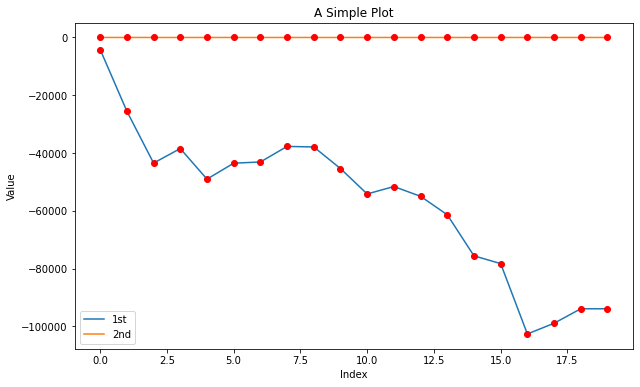

In [15]:
print(y)
y[:, 0] = y[:, 0] * 100

plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.legend(loc=0)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('A Simple Plot')

Inspection of the plot reveals that the first data set is still "visually readable", while the second data set now looks like a straight line with the new scaling of the y-axis. In a sense, information about the second data set now gets "visually lost". There are two basic approaches to resolve this problem through means of plotting — instead of adjusting the data (e.g. through rescaling):

* Use of two y-axes (left/right);
* Use of two subplots (upper/lower, left/right).

First, the code introduces a second y-axis to the plot. The left y-axis is for the first data set while the right y-axis is for the second. Consequently, there are also two legends:

Text(0, 0.5, 'Value 2nd')

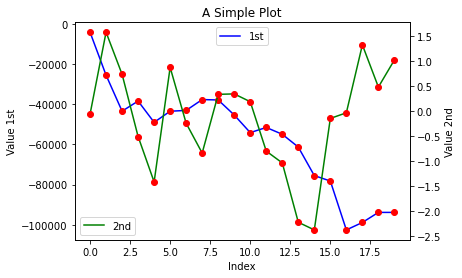

In [16]:
fig, ax1 = plt.subplots()
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=9)
plt.xlabel('Index')
plt.ylabel('Value 1st')
plt.title('A Simple Plot')
ax2 = ax1.twinx()
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=3)
plt.ylabel('Value 2nd')

The key lines of code are those that help manage the axes:

**fig, ax1 = plt.subplots()**

**ax2 = ax1.twinx()**

By using the **plt.subplots()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) function, one gets direct access to the underlying plotting objects (the figure, subplots, etc.). It allows, for example, using **.twinx()** function (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.twinx.html#matplotlib.pyplot.twinx) to generate a second subplot that shares the x-axis with the first subplot. Then, actually two subplots overlay each other.

Next, consider the case of two separate subplots. This option gives even more freedom to handle the two data sets, as plot with two subplots illustrates. The placing of subplots in a **matplotlib** **figure** object is accomplished by the use of a special coordinate system. **plt.subplot()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot) takes as arguments three integers for **numrows**, **numcols**, and **fignum** (either separated by commas or not). **numrows** specifies the number of rows, **numcols** the number of columns, and **fignum** the number of the subplot, starting with 1 and ending with numrows×numcols. For example, a figure with nine equally sized subplots would have **numrows=3**, **numcols=3**, and **fignum=1,2,...,9**. The lower-right subplot would have the following coordinates: **plt.subplot(3, 3, 9)** :

Text(0, 0.5, 'Value')

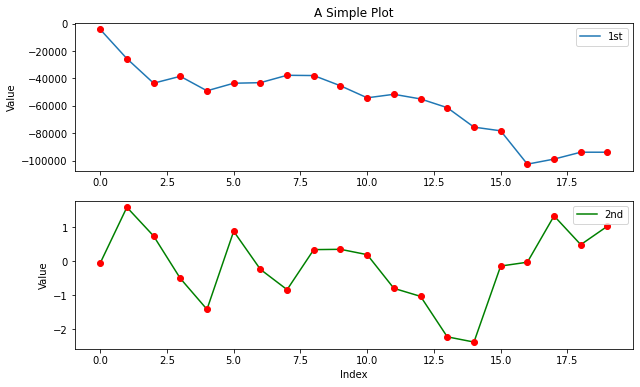

In [17]:
plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.ylabel('Value')
plt.title('A Simple Plot')
plt.subplot(2,1,2)
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.xlabel('Index')
plt.ylabel('Value')

Sometimes, it might be necessary or desired to choose two different plot types to visualize such data. With the subplot approach one has the freedom to combine arbitrary kinds of plots that **matplotlib** offers. The following plot combines a line/point plot with a bar (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) chart:

Text(0.5, 1.0, '2nd Data Set')

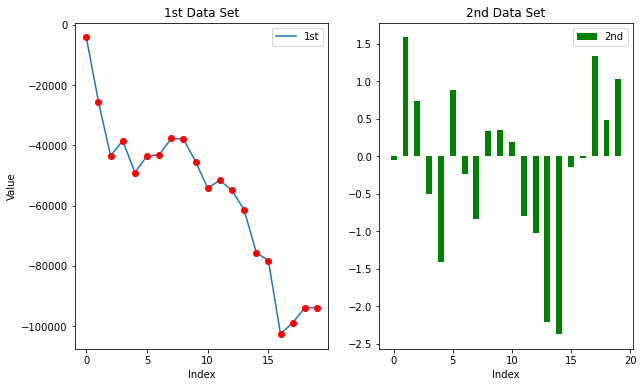

In [18]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('1st Data Set')
plt.subplot(1,2,2)
plt.bar(np.arange(len(y)), y[:, 1],
        width=0.5,
        color='g',
        label='2nd')
plt.legend(loc=0)
plt.xlabel('Index')
plt.title('2nd Data Set')

#### 5.1. Some alternative, and for financial applications useful, visualization approaches 

##### 5.1.1. Scatterplot

The first is the scatter plot, where the values of one data set serve as the **_x_** values for the other data set. Such a plot type is used, for example, for plotting the returns of one financial time series against those of another one. This example uses a new two-dimensional data set with some more data:

In [19]:
np.random.seed(3)
y = np.random.standard_normal((1000, 2))
y

array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       ...,
       [ 0.07857912, -1.64893731],
       [-0.17225583, -0.81617628],
       [-1.00324514,  0.21483031]])

Text(0.5, 1.0, 'Scatter Plot')

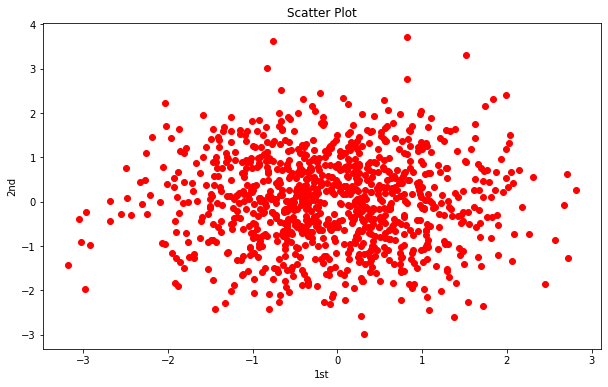

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1], 'ro')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

**matplotlib** also provides a specific function to generate scatter plots. It basically works in the same way, but provides some additional features. Scatter plot generated using the **plt.scatter()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) function:

Text(0.5, 1.0, 'Scatter Plot')

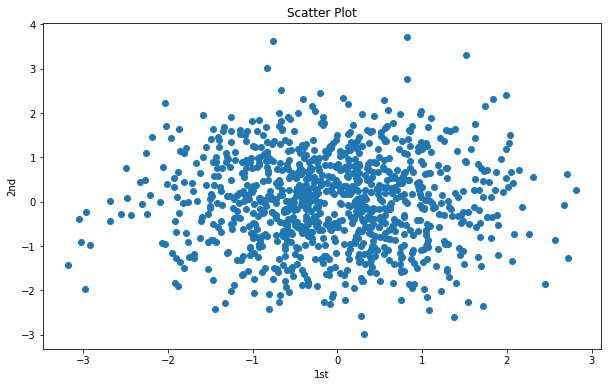

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], marker='o')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

The **plt.scatter()** plotting function, for example, allows the addition of a third dimension, which can be visualized through different colors and be described by the use of a color bar. The following code generates a third data set with random data, this time with integers between 0 and 10:

In [22]:
np.random.seed(4)
c = np.random.randint(0, 10, len(y))
c

array([7, 5, 1, 8, 7, 8, 2, 9, 7, 7, 7, 9, 8, 4, 2, 6, 4, 3, 0, 7, 5, 5,
       9, 6, 6, 8, 2, 5, 8, 1, 2, 7, 0, 8, 3, 1, 0, 3, 2, 3, 2, 9, 2, 1,
       0, 1, 9, 9, 0, 7, 2, 6, 3, 7, 8, 2, 6, 7, 7, 9, 2, 7, 5, 3, 0, 5,
       4, 3, 8, 9, 5, 8, 6, 7, 0, 4, 6, 8, 4, 8, 1, 9, 5, 4, 2, 3, 4, 7,
       6, 6, 8, 0, 3, 5, 6, 1, 1, 6, 0, 8, 7, 5, 7, 6, 8, 4, 4, 0, 7, 2,
       1, 8, 8, 1, 3, 1, 3, 6, 7, 4, 0, 7, 3, 7, 9, 6, 6, 9, 3, 2, 7, 6,
       7, 9, 4, 3, 0, 5, 0, 9, 5, 7, 5, 9, 8, 2, 4, 2, 3, 0, 3, 6, 9, 0,
       3, 4, 8, 6, 3, 7, 3, 9, 1, 4, 8, 3, 0, 2, 4, 6, 1, 9, 0, 9, 3, 1,
       2, 3, 2, 9, 5, 2, 7, 9, 5, 6, 5, 9, 9, 6, 8, 5, 4, 4, 6, 2, 2, 1,
       3, 7, 4, 0, 5, 7, 3, 8, 5, 9, 1, 5, 4, 3, 9, 5, 6, 6, 1, 0, 5, 2,
       0, 5, 8, 5, 7, 8, 9, 9, 0, 3, 7, 0, 4, 7, 7, 4, 1, 3, 0, 7, 7, 5,
       1, 5, 3, 9, 3, 0, 9, 7, 6, 1, 7, 9, 6, 3, 7, 2, 7, 8, 9, 1, 2, 9,
       0, 6, 8, 5, 7, 5, 8, 1, 2, 3, 0, 5, 5, 6, 6, 0, 9, 5, 5, 3, 5, 9,
       1, 1, 9, 8, 1, 9, 1, 0, 6, 0, 0, 2, 8, 9, 0,

Text(0.5, 1.0, 'Scatter Plot')

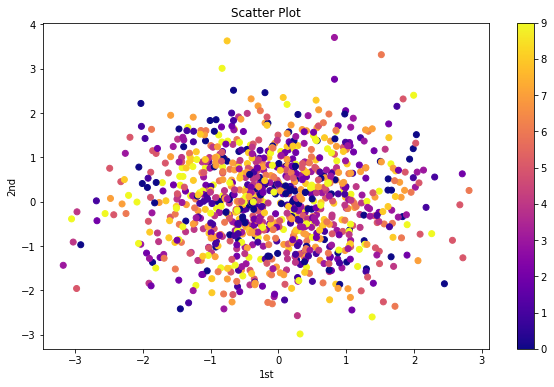

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1],
            c=c,
            cmap='plasma',
            marker='o')
plt.colorbar()
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

##### 5.1.2. Histogram

Another type of plot, the histogram, is also often used in the context of financial returns. **plt.hist()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist) puts the frequency values of the two data sets next to each other in the same plot:

Text(0.5, 1.0, 'Histogram')

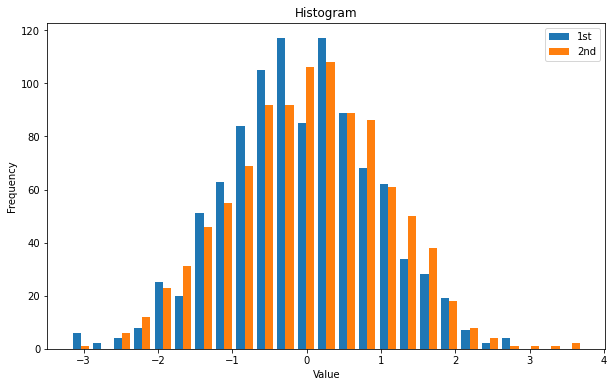

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(y,
         label=['1st', '2nd'],
         bins=25)
plt.legend(loc=0)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

The following plot shows the data, but the two data sets are stacked in the histogram:

Text(0.5, 1.0, 'Histogram')

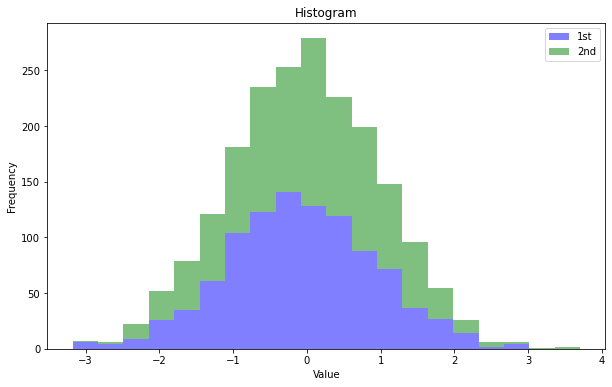

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(y,
         label=['1st', '2nd'],
         color=['b', 'g'],
         stacked=True,
         bins=20,
         alpha=0.5)
plt.legend(loc=0)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

##### 5.1.3. Boxplot

Another useful plot type is the boxplot. Similar to the histogram, the boxplot allows both a concise overview of the characteristics of a data set and easy comparison of multiple data sets. Such a plot for our data set using **plt.boxplot()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot) :

Text(0.5, 1.0, 'Boxplot')

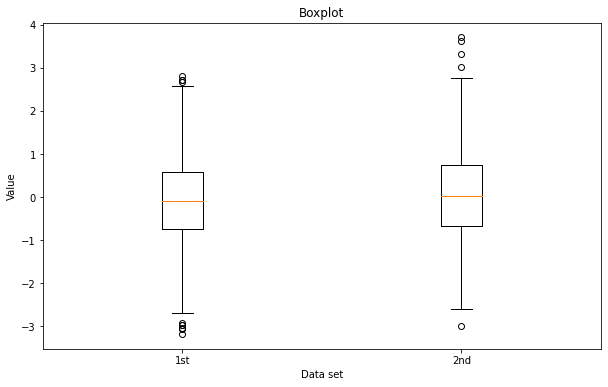

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot(y)
plt.setp(ax,
         xticklabels=['1st', '2nd'])
plt.xlabel('Data set')
plt.ylabel('Value')
plt.title('Boxplot')

This last example uses the function **plt.setp()** (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.setp.html#matplotlib.pyplot.setp), which sets properties for a (set of) plotting instance(s). For example, consider a line plot generated by:

**line = plt.plot(data, 'r')**

The following code changes the style of the line to dashed:

**plt.setp(line, linestyle='--')**

This way, one can easily change parameters after the plotting instance (“artist object”) has been generated.

**_Exercises._**

Exercise 1. The **stock** **DataFrame** contains data on stock price and trading volume. Plot stock price (line) and volume (bar) on the same plot, using 2 y axes

Text(0, 0.5, 'Price ($)')

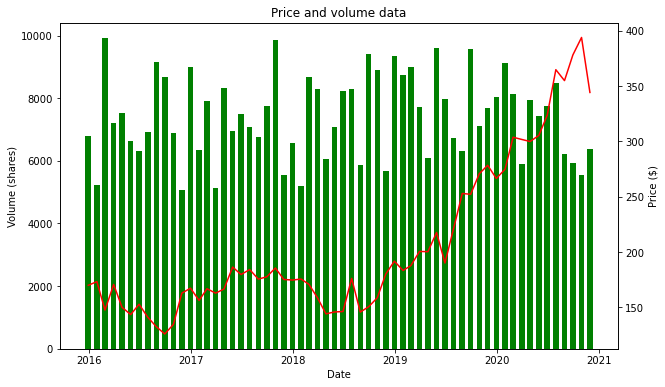

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ret = 0.02427579
var = 0.00655305
S_0 = 171.45
periods = 60

np.random.seed(2)
returns = np.random.normal(ret, np.sqrt(var), periods)
volume = (np.random.rand(periods) * 5000 + 5000).round()

stock_price = ((returns + 1).cumprod() * S_0).round(2)
data = np.array([stock_price, volume]).T

dates = pd.date_range('2015-12-1', periods=periods, freq='M')
stock = pd.DataFrame(data,
                     columns=['Price', 'Volume'],
                     index=dates)

#Your code starts here
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.bar(stock.index, stock['Volume'],
        color='g',
        width = 20)
plt.title('Price and volume data')
plt.xlabel('Date')
plt.ylabel('Volume (shares)')
ax2 = ax1.twinx()
plt.plot(stock['Price'],
         'r',
         label='Price')
plt.ylabel('Price ($)')